<a href="https://colab.research.google.com/github/Trieu1020/baitapAI1/blob/main/AI4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 18.0 MB/s eta 0:00:00


DeliveryPriority: 46.50000000000001
OrdersToCombine: 4.5404040404040416


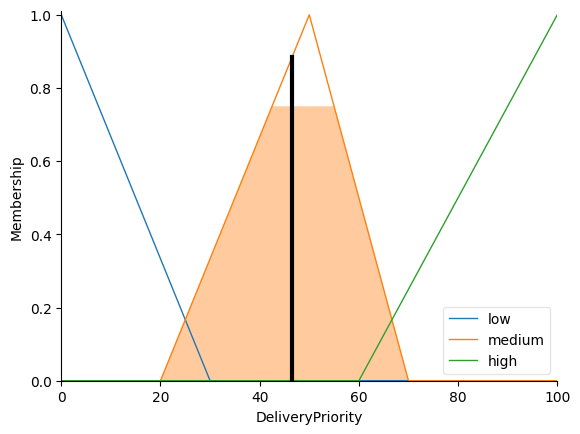

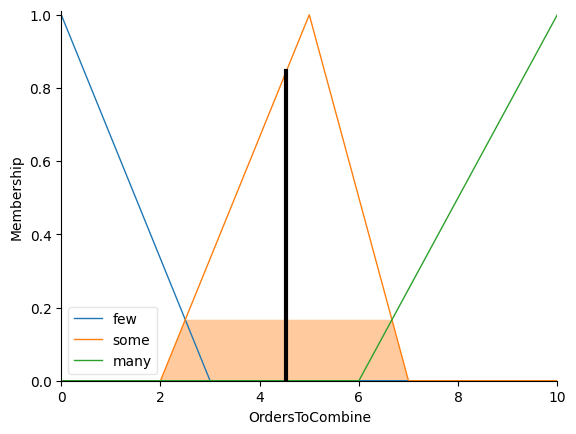

In [78]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl


OrderDensity = ctrl.Antecedent(np.arange(0, 101, 1), 'OrderDensity')
DeliveryUrgency = ctrl.Antecedent(np.arange(0, 101, 1), 'DeliveryUrgency')
DriverLoad = ctrl.Antecedent(np.arange(0, 101, 1), 'DriverLoad')
TrafficCondition = ctrl.Antecedent(np.arange(0, 101, 1), 'TrafficCondition')
ProfitPerDelivery = ctrl.Antecedent(np.arange(0, 101, 1), 'ProfitPerDelivery')

OrdersToCombine = ctrl.Consequent(np.arange(0, 11, 1), 'OrdersToCombine')
DeliveryPriority = ctrl.Consequent(np.arange(0, 101, 1), 'DeliveryPriority')

OrderDensity['low'] = fuzz.trimf(OrderDensity.universe, [0, 0, 30])
OrderDensity['medium'] = fuzz.trimf(OrderDensity.universe, [20, 50, 70])
OrderDensity['high'] = fuzz.trimf(OrderDensity.universe, [60, 100, 100])

DeliveryUrgency['low'] = fuzz.trimf(DeliveryUrgency.universe, [0, 0, 30])
DeliveryUrgency['medium'] = fuzz.trimf(DeliveryUrgency.universe, [20, 50, 70])
DeliveryUrgency['high'] = fuzz.trimf(DeliveryUrgency.universe, [60, 100, 100])

DriverLoad['low'] = fuzz.trimf(DriverLoad.universe, [0, 0, 30])
DriverLoad['medium'] = fuzz.trimf(DriverLoad.universe, [20, 50, 70])
DriverLoad['high'] = fuzz.trimf(DriverLoad.universe, [60, 100, 100])

TrafficCondition['low'] = fuzz.trimf(TrafficCondition.universe, [0, 0, 30])
TrafficCondition['medium'] = fuzz.trimf(TrafficCondition.universe, [20, 50, 70])
TrafficCondition['high'] = fuzz.trimf(TrafficCondition.universe, [60, 100, 100])

ProfitPerDelivery['low'] = fuzz.trimf(ProfitPerDelivery.universe, [0, 0, 30])
ProfitPerDelivery['medium'] = fuzz.trimf(ProfitPerDelivery.universe, [20, 50, 70])
ProfitPerDelivery['high'] = fuzz.trimf(ProfitPerDelivery.universe, [60, 100, 100])

OrdersToCombine['few'] = fuzz.trimf(OrdersToCombine.universe, [0, 0, 3])
OrdersToCombine['some'] = fuzz.trimf(OrdersToCombine.universe, [2, 5, 7])
OrdersToCombine['many'] = fuzz.trimf(OrdersToCombine.universe, [6, 10, 10])

DeliveryPriority['low'] = fuzz.trimf(DeliveryPriority.universe, [0, 0, 30])
DeliveryPriority['medium'] = fuzz.trimf(DeliveryPriority.universe, [20, 50, 70])
DeliveryPriority['high'] = fuzz.trimf(DeliveryPriority.universe, [60, 100, 100])

rules = [
    ctrl.Rule(OrderDensity['high'] & DriverLoad['low'] & TrafficCondition['low'],OrdersToCombine['many']),
    ctrl.Rule(OrderDensity['medium'] & TrafficCondition['high'] & DeliveryUrgency['medium'],OrdersToCombine['some']),
    ctrl.Rule(DriverLoad['high'] & OrderDensity['high'] & ProfitPerDelivery['medium'],OrdersToCombine['some']),
    ctrl.Rule(OrderDensity['low'] & DeliveryUrgency['high'] & TrafficCondition['medium'],OrdersToCombine['some']),
    ctrl.Rule(ProfitPerDelivery['high'] & DeliveryUrgency['high'] & TrafficCondition['high'],OrdersToCombine['some']),
    ctrl.Rule(DeliveryUrgency['high'] & ProfitPerDelivery['high'],DeliveryPriority['high']),
    ctrl.Rule(DeliveryUrgency['medium'] & TrafficCondition['medium'],DeliveryPriority['medium']),
    ctrl.Rule(DeliveryUrgency['low'] & OrderDensity['high'] & ProfitPerDelivery['low'],DeliveryPriority['low']),
    ctrl.Rule(OrderDensity['high'] & DriverLoad['low'] & TrafficCondition['medium'] &DeliveryUrgency['medium'] & ProfitPerDelivery['medium'],(OrdersToCombine['some'],DeliveryPriority['medium']))
]

control_system = ctrl.ControlSystem(rules)
fuzzy_system = ctrl.ControlSystemSimulation(control_system)

fuzzy_system.input['OrderDensity'] = 95
fuzzy_system.input['DeliveryUrgency'] = 55
fuzzy_system.input['DriverLoad'] = 25
fuzzy_system.input['TrafficCondition'] = 50
fuzzy_system.input['ProfitPerDelivery'] = 55

fuzzy_system.compute()

print('DeliveryPriority:',fuzzy_system.output['DeliveryPriority'])
print('OrdersToCombine:',fuzzy_system.output['OrdersToCombine'])
DeliveryPriority.view(sim=fuzzy_system)
OrdersToCombine.view(sim=fuzzy_system)